In [1]:
import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from scipy.stats import variation, kurtosis, skew
from sklearn.preprocessing import normalize
import math

In [2]:
distancesDir = 'decade_distances_complete/*.pickle'
distances_raw = []
for name in glob.glob(distancesDir):
    year = int(name[26:30])
    with open(name, 'rb') as f:
        distances_raw.append((year, pickle.load(f)))
        f.close()

distances = [(yr, df) for yr, df in distances_raw if yr >= 1880 and yr <= 1945]
distances.sort(key=lambda i: i[0])

In [3]:
distancesDir = 'decade_distances_complete/*.pickle'
distances_raw = []
for name in glob.glob(distancesDir):
    year = int(name[26:30])
    with open(name, 'rb') as f:
        distances_raw.append((year, pickle.load(f)))
        f.close()

distances = [(yr, df) for yr, df in distances_raw if yr >= 1880 and yr <= 1945]
distances.sort(key=lambda i: i[0])

In [4]:
dfDict = {'year': [],
         'skew_JSD': [],
         'kurtosis_JSD': [],
         'skew_APD': [],
         'kurtosis_APD': [],
         'skew_JSDist': [],
         'kurtosis_JSDist': [],
         'skew_PRT': [],
         'kurtosis_PRT': [],
         'skew_DIV': [],
         'kurtosis_DIV': []}

for yr, df in distances:
    apd = df['apd'].to_numpy()
    jsd = df['jsd'].to_numpy()
    prt = df['prt'].to_numpy()
    div = df['div'].to_numpy()
    jsdist = np.array([math.sqrt(i) for i in jsd])
    
    # add yr to pdDict
    dfDict['year'].append(yr)
    
    for name, method in [('JSD', jsd), ('JSDist', jsdist), ('PRT', prt), ('DIV', div), ('APD', apd)]:
        dfDict['skew_' + name].append(np.round(skew(method, nan_policy='omit'), 3))
        dfDict['kurtosis_' + name].append(np.round(kurtosis(method, nan_policy='omit'), 3))
    
df = pd.DataFrame(dfDict)

In [5]:
print(df)

    year  skew_JSD  kurtosis_JSD  skew_APD  kurtosis_APD  skew_JSDist  \
0   1880     1.293         1.984     0.344         1.239        0.519   
1   1885     1.339         2.456     0.243         0.728        0.484   
2   1890     1.549         3.149     0.122         1.018        0.725   
3   1895     1.691         3.858    -0.288         2.664        0.797   
4   1900     1.751         4.011    -0.068         1.882        0.879   
5   1905     1.749         4.092    -0.016         1.381        0.830   
6   1910     1.568         3.472     0.023         1.609        0.675   
7   1915     1.379         2.469     0.093         2.192        0.577   
8   1920     1.559         3.090     0.016         1.070        0.802   
9   1925     1.657         3.559     0.032         1.237        0.807   
10  1930     1.330         2.419     0.006         1.820        0.496   
11  1935     1.049         1.506    -0.012         1.421        0.334   
12  1940     0.943         0.746     0.271         

In [13]:
skewDict = {'year': [], 'JSD': [], 'JSDist': [], 'APD': [], 'PRT': [], 'DIV': []}
for yr, df in distances:
    apd = df['apd'].to_numpy()
    jsd = df['jsd'].to_numpy()
    prt = df['prt'].to_numpy()
    div = df['div'].to_numpy()
    jsdist = np.array([math.sqrt(i) for i in jsd])
    
    # add yr to pdDict
    skewDict['year'].append(yr)
    
    for name, method in [('JSD', jsd), ('JSDist', jsdist), ('PRT', prt), ('DIV', div), ('APD', apd)]:
        skewDict[name].append(np.round(skew(method, nan_policy='omit'), 3))
    
skew_df = pd.DataFrame(skewDict)

In [14]:
print(skew_df)

    year    JSD  JSDist    APD    PRT    DIV
0   1880  1.293   0.519  0.344  2.349  1.814
1   1885  1.339   0.484  0.243  1.988  1.638
2   1890  1.549   0.725  0.122  2.381  2.098
3   1895  1.691   0.797 -0.288  2.826  1.826
4   1900  1.751   0.879 -0.068  2.223  2.047
5   1905  1.749   0.830 -0.016  2.435  2.235
6   1910  1.568   0.675  0.023  2.355  1.699
7   1915  1.379   0.577  0.093  3.479  1.819
8   1920  1.559   0.802  0.016  3.029  1.919
9   1925  1.657   0.807  0.032  2.913  1.940
10  1930  1.330   0.496  0.006  3.988  1.655
11  1935  1.049   0.334 -0.012  2.277  1.474
12  1940  0.943   0.273  0.271  2.845  1.474


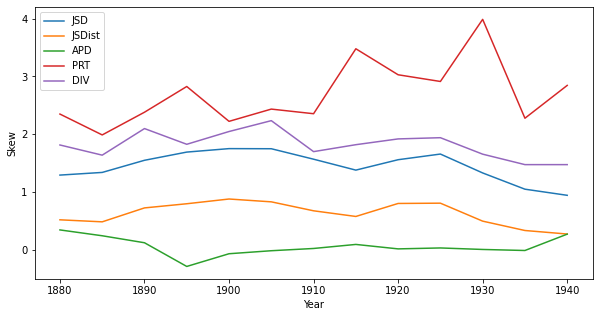

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Year')
ax.set_ylabel('Skew')
for m in ['JSD', 'JSDist', 'APD', 'PRT', 'DIV']:
    ax.plot(skew_df['year'], skew_df[m], label=m)

ax.legend()
plt.savefig('diachronicdist.png', dpi=750)
plt.show()